# 11장. 신경망 분류 모델
## 11.1 신경망 분류 모델의 필요성

In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import make_circles

In [2]:
# 데이터 생성
xy, labels = make_circles(n_samples=200, noise=0.1, random_state=717)
labels = labels.reshape(-1,1)

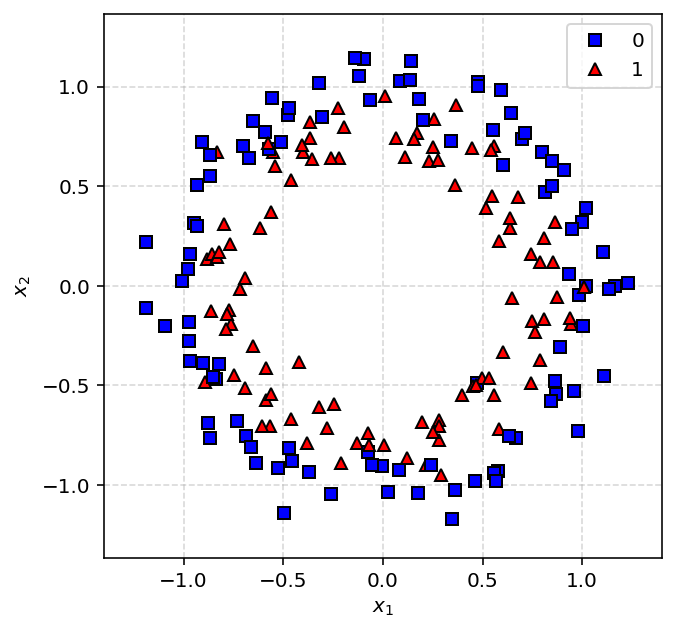

In [3]:
from pandas import DataFrame
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
plt.legend([0, 1])
plt.show()

In [4]:
# 특성값
f1 = lambda x,y: [x, y]
f2 = lambda x,y: [x**2, y**2]

In [5]:
# 선형 분류 모델
class MyModel(tf.keras.Model):
    def __init__(self, dim=1, **kwargs):
        super().__init__(**kwargs)
        self.W = tf.Variable(tf.ones([dim,1]), dtype=tf.float32) 
        self.b = tf.Variable(tf.ones([1]), dtype=tf.float32) 

    def call(self, x): 
        return tf.nn.sigmoid(tf.matmul(x, self.W) + self.b)

In [6]:
def plot_model(model, feature_labmda, xy, labels, title=''):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.3,1.3, 400), np.linspace(-1.3,1.3, 400))
    input_xy = np.array([feature_labmda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])
    prediction = model(input_xy).numpy()
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(5, 5))
    cs = ax.contourf(xx, yy, Z, 20, cmap='coolwarm', alpha=.8)
    ax.clabel(cs, colors='k')
    cs = ax.contour(xx, yy, Z, cmap=plt.cm.Greys, levels=[0, 0.5], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')

    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(title)
    plt.show()

Epoch 1/15
8/8 [==============================] - 0s 711us/step - loss: 0.8300
Epoch 2/15
8/8 [==============================] - 0s 729us/step - loss: 0.7122
Epoch 3/15
8/8 [==============================] - 0s 729us/step - loss: 0.7018
Epoch 4/15
8/8 [==============================] - 0s 673us/step - loss: 0.6967
Epoch 5/15
8/8 [==============================] - 0s 582us/step - loss: 0.6946
Epoch 6/15
8/8 [==============================] - 0s 686us/step - loss: 0.6960
Epoch 7/15
8/8 [==============================] - 0s 728us/step - loss: 0.6954
Epoch 8/15
8/8 [==============================] - 0s 662us/step - loss: 0.6948
Epoch 9/15
8/8 [==============================] - 0s 723us/step - loss: 0.6941
Epoch 10/15
8/8 [==============================] - 0s 713us/step - loss: 0.6939
Epoch 11/15
8/8 [==============================] - 0s 628us/step - loss: 0.6942
Epoch 12/15
8/8 [==============================] - 0s 737us/step - loss: 0.6943
Epoch 13/15
8/8 [==============================] 

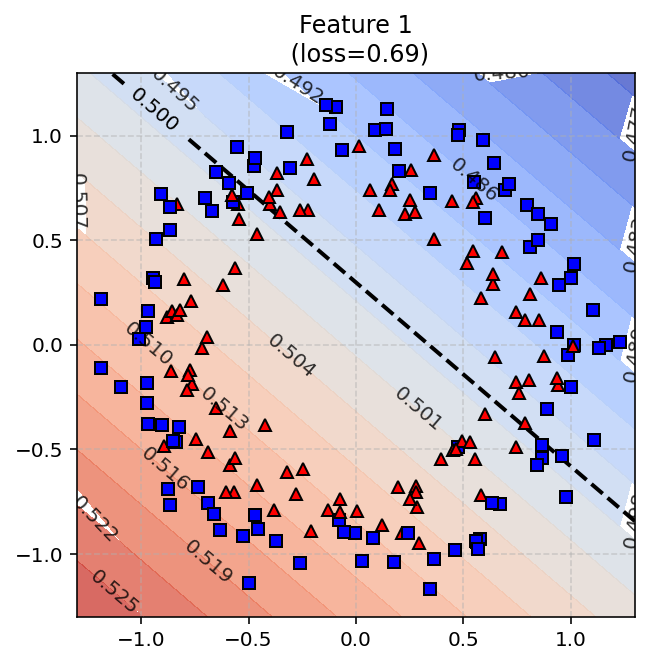

Epoch 1/15
8/8 [==============================] - 0s 1ms/step - loss: 0.9715
Epoch 2/15
8/8 [==============================] - 0s 1ms/step - loss: 0.7111
Epoch 3/15
8/8 [==============================] - 0s 1ms/step - loss: 0.6946
Epoch 4/15
8/8 [==============================] - 0s 2ms/step - loss: 0.6608
Epoch 5/15
8/8 [==============================] - 0s 2ms/step - loss: 0.6266
Epoch 6/15
8/8 [==============================] - 0s 2ms/step - loss: 0.6098
Epoch 7/15
8/8 [==============================] - 0s 2ms/step - loss: 0.5888
Epoch 8/15
8/8 [==============================] - 0s 2ms/step - loss: 0.5681
Epoch 9/15
8/8 [==============================] - 0s 2ms/step - loss: 0.5486
Epoch 10/15
8/8 [==============================] - 0s 2ms/step - loss: 0.5308
Epoch 11/15
8/8 [==============================] - 0s 2ms/step - loss: 0.5149
Epoch 12/15
8/8 [==============================] - 0s 2ms/step - loss: 0.4999
Epoch 13/15
8/8 [==============================] - 0s 2ms/step - loss: 0.

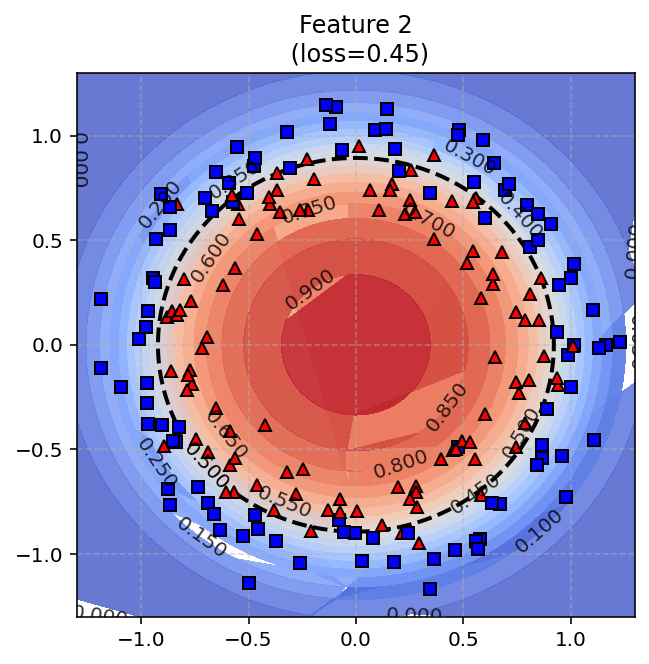

In [7]:
from helper import generate_batches
for i, f_fn in enumerate([f1, f2], 1):
    features = np.array([f_fn(xval, yval) for xval, yval in xy])
    dim_features = features.shape[1]

    model = MyModel(dim_features)

    np.random.seed(7382)
    shuffled_id = np.arange(0, len(features))
    np.random.shuffle(shuffled_id)
    shuffled_features = features[shuffled_id]
    shuffled_labels = labels[shuffled_id]

    MaxEpochs = 15
    batch_size = 25
    lr = 0.1

    model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = tf.keras.losses.BinaryCrossentropy())
    model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)
    
    prediction_values = model(features).numpy()
    loss = lambda y, yhat: tf.reduce_mean(-y * tf.math.log(yhat) - (1-y) * tf.math.log(1-yhat))
    final_loss = loss(labels, prediction_values)
    print('W={}, b={}'.format(model.W.numpy().flatten(), model.b.numpy()))

    plot_model(model, f_fn, xy, labels, 'Feature {}\n (loss={:1.2f})'.format(i, final_loss))

## 11.2 다양한 데이터 분포와 신경망 분류 모델

In [8]:
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

In [9]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10 
        num_hidden2 = 5

        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        yhat = tf.nn.sigmoid(l3)
        return yhat

In [10]:
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

In [11]:
# 하이퍼 파라미터
MaxEpochs = 30
lr = 0.1
batch_size = 25

In [12]:
# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

In [13]:
# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/30
8/8 [==============================] - 1s 1ms/step - loss: 0.7178 - accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 0s 929us/step - loss: 0.7182 - accuracy: 0.4600
Epoch 3/30
8/8 [==============================] - 0s 941us/step - loss: 0.6899 - accuracy: 0.5300
Epoch 4/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4850
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5100
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5300
Epoch 7/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5250
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5200
Epoch 9/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5200
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5550
Epoch 11/30
8/8 [==================

In [14]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 881us/step - loss: 0.3259 - accuracy: 0.8800
[0.3259347081184387, 0.8799999952316284]


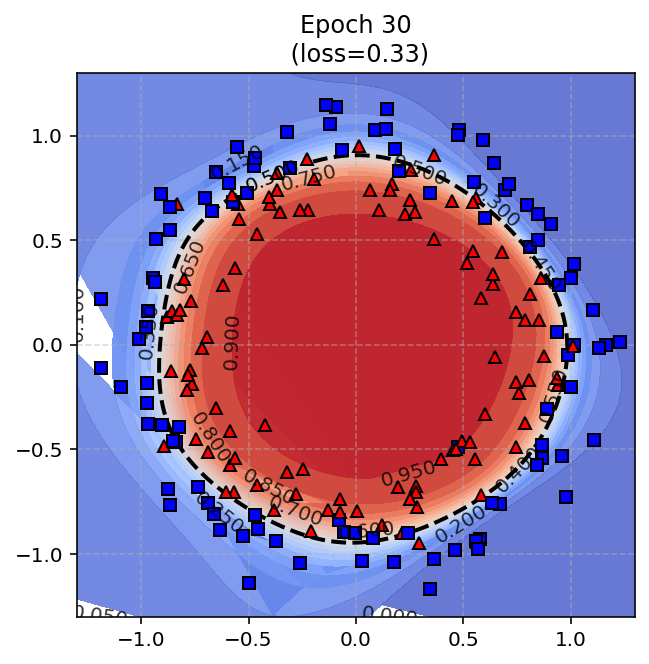

In [15]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.2f})'.format(MaxEpochs, final_loss[0]))

### 체커보드 예제

In [16]:
# 데이터
np.random.seed(410)
xy = np.random.uniform(-1,1, (200,2))
labels = np.zeros((200), dtype=np.int32)
labels[xy[:,0] * xy[:,1] > 0] = 1
labels = labels.reshape(-1, 1)

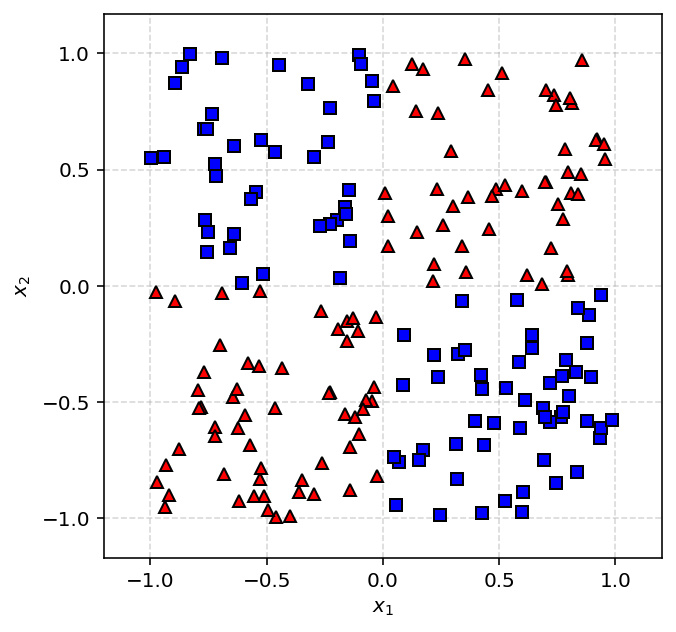

In [17]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.show()

In [18]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

In [19]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10 
        num_hidden2 = 5

        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        yhat = tf.nn.sigmoid(l3)
        return yhat

In [20]:
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 30
lr = 0.1
batch_size = 25

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/30
8/8 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.5750
Epoch 2/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4600
Epoch 3/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7450
Epoch 4/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.7300
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7550
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7500
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8700
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8800
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8850
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8900
Epoch 11/30
8/8 [======================

In [21]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 1.0000
[0.022673698142170906, 1.0]


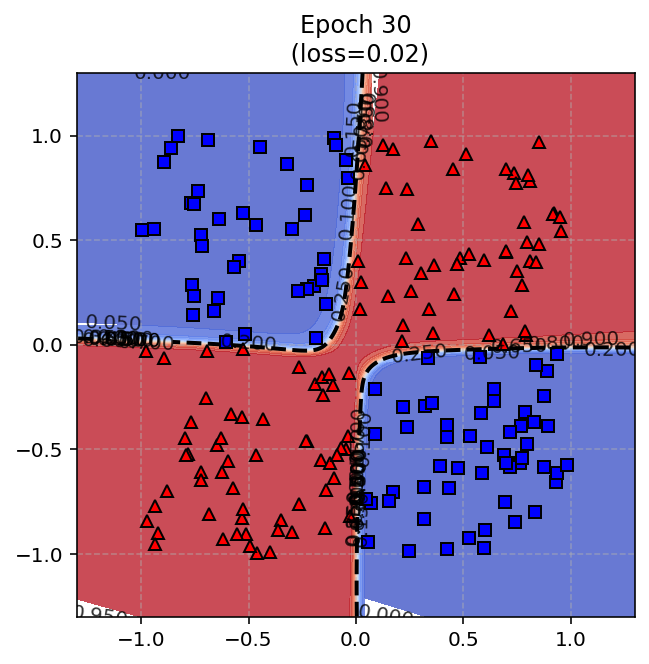

In [22]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.2f})'.format(MaxEpochs, final_loss[0]))

### 불규칙 데이터

In [23]:
from sklearn.datasets import make_blobs
# 불규칙 데이터 생성
xy, labels = make_blobs(n_samples=200, center_box=(-1,1), centers=6,cluster_std=0.1, random_state=20)
labels = labels % 2
labels = labels.reshape(-1,1)

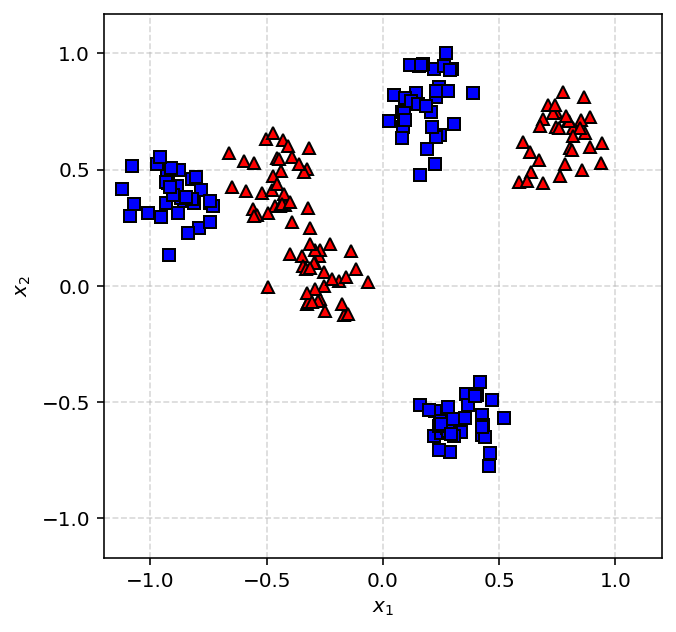

In [24]:
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
# plt.legend([0, 1])
plt.show()

In [25]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

In [26]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10 
        num_hidden2 = 5

        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        yhat = tf.nn.sigmoid(l3)
        return yhat

In [27]:
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 30
lr = 0.1
batch_size = 25

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/30
8/8 [==============================] - 0s 1ms/step - loss: 0.7187 - accuracy: 0.5600
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6350
Epoch 3/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6300
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.5600
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.6450
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.6650
Epoch 7/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.6450
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.5900
Epoch 9/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.5400
Epoch 10/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.6150
Epoch 11/30
8/8 [======================

In [28]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9850
[0.06817752867937088, 0.9850000143051147]


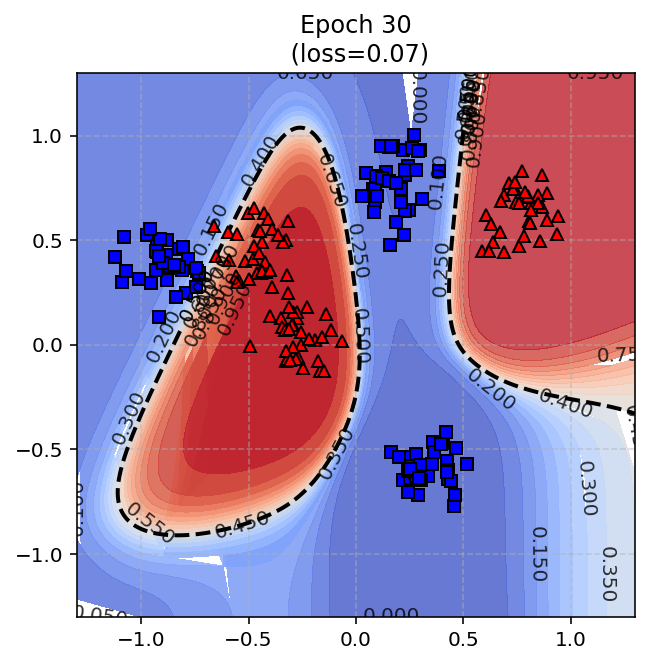

In [29]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.2f})'.format(MaxEpochs, final_loss[0]))

### 불규칙 데이터 - ReLU

In [30]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10 
        num_hidden2 = 5

        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.relu(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.relu(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        yhat = tf.nn.sigmoid(l3)
        return yhat

In [31]:
MaxEpochs = 30
lr = 0.1
batch_size = 25

optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/30
8/8 [==============================] - 1s 901us/step - loss: 0.9932 - accuracy: 0.5450
Epoch 2/30
8/8 [==============================] - 0s 928us/step - loss: 0.4759 - accuracy: 0.7950
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8600
Epoch 4/30
8/8 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.8700
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8900
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9000
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9450
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9650
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9850
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9900
Epoch 11/30
8/8 [==================

In [32]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 1.0000
[0.010964998044073582, 1.0]


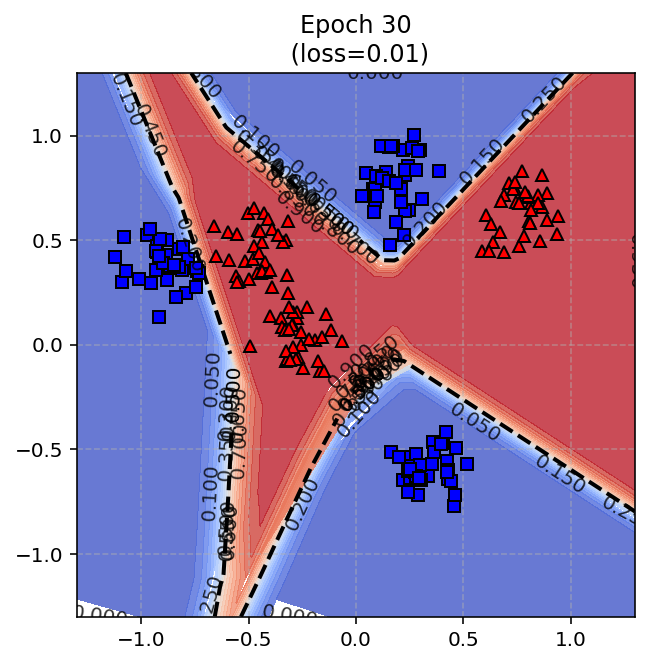

In [33]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.2f})'.format(MaxEpochs, final_loss[0]))

## 11.3 신경망 분류 모델의 다양한 표현

In [34]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=119)
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10 
        num_hidden2 = 5

        self.hidden1 = tf.keras.layers.Dense(num_hidden1, activation=tf.nn.sigmoid, 
            kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1')

        self.hidden2 = tf.keras.layers.Dense(num_hidden2, activation=tf.nn.sigmoid, 
            kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2')

        self.out = tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, 
            kernel_initializer=initializer, bias_initializer=initializer, name='output')

    def call(self, x):
        h1 = self.hidden1(x) 
        h2 = self.hidden2(h1)
        yhat = self.out(h2) 
        return yhat

In [35]:
MaxEpochs = 30
lr = 0.1
batch_size = 25

optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/30
8/8 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.5400
Epoch 2/30
8/8 [==============================] - 0s 987us/step - loss: 0.6138 - accuracy: 0.6500
Epoch 3/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.6650
Epoch 4/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.6650
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.6750
Epoch 6/30
8/8 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8300
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8400
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8400
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8350
Epoch 10/30
8/8 [==============================] - 0s 1ms/step - loss: 0.3264 - accuracy: 0.8450
Epoch 11/30
8/8 [====================

In [36]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 1.0000
[0.009006360545754433, 1.0]


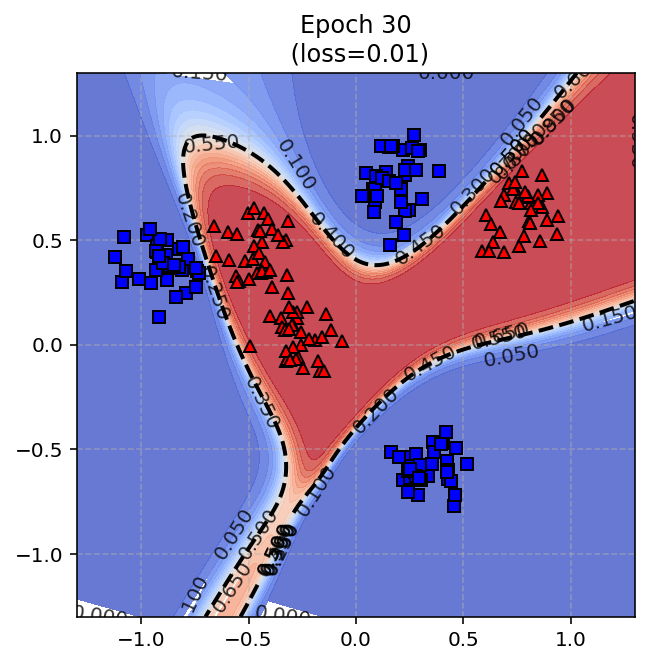

In [37]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.2f})'.format(MaxEpochs, final_loss[0]))

In [38]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=119)
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10 
        num_hidden2 = 5

        self.hidden1 = tf.keras.layers.Dense(num_hidden1, activation=tf.nn.sigmoid, 
            kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1')

        self.hidden2 = tf.keras.layers.Dense(num_hidden2, activation=tf.nn.sigmoid, 
            kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2')

        self.out = tf.keras.layers.Dense(1, activation = None, 
            kernel_initializer=initializer, bias_initializer=initializer, name='output')

    def call(self, x):
        h1 = self.hidden1(x) 
        h2 = self.hidden2(h1) 
        yhat = self.out(h2) 
        return yhat

In [39]:
MaxEpochs = 30
lr = 0.1
batch_size = 25

optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/30
8/8 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.5550
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.5500
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.6700
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7650
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.8100
Epoch 6/30
8/8 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8300
Epoch 7/30
8/8 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8250
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8500
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8650
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8550
Epoch 11/30
8/8 [======================

## 11.4 MNIST 분류 문제

In [40]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

feature_train = x_train.reshape(-1,784)
feature_test = x_test.reshape(-1,784)

label_train = tf.one_hot(y_train,10).numpy()
label_test = tf.one_hot(y_test,10).numpy()

In [41]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=119)

class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 20 
        num_hidden2 = 10

        self.hidden1 = tf.keras.layers.Dense(num_hidden1, activation=tf.nn.sigmoid, 
            kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1')

        self.hidden2 = tf.keras.layers.Dense(num_hidden2, activation=tf.nn.sigmoid, 
            kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2')

        self.out = tf.keras.layers.Dense(10, activation = tf.nn.softmax, 
            kernel_initializer=initializer, bias_initializer=initializer, name='output')

    def call(self, x):
        h1 = self.hidden1(x) 
        h2 = self.hidden2(h1)
        yhat = self.out(h2) 
        return yhat

In [42]:
np.random.seed(320)
shuffled_id = np.arange(0, len(feature_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = feature_train[shuffled_id]
shuffled_y_train = label_train[shuffled_id]

In [43]:
MaxEpochs = 10
lr = 0.01
batch_size = 128

optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.CategoricalCrossentropy()

In [44]:
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_x_train, shuffled_y_train, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 1.0078 - accuracy: 0.6987
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3479 - accuracy: 0.9010
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2781 - accuracy: 0.9212
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2421 - accuracy: 0.9309
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2167 - accuracy: 0.9375
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2005 - accuracy: 0.9423
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1866 - accuracy: 0.9461
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1758 - accuracy: 0.9484
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1679 - accuracy: 0.9513
Epoch 10/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1598 - accuracy: 0.9543

In [45]:
results=model.evaluate(feature_test,label_test)
print("test loss, test acc:", results)

313/313 [==============================] - 0s 669us/step - loss: 0.2214 - accuracy: 0.9380
test loss, test acc: [0.22142618894577026, 0.9380000233650208]
